## Importing libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV

## Loading Data Set

In [2]:
#IA19 = pd.read_csv('Data/IA19_CD70_TPM_log_ALL.csv')
#IA19 = pd.read_csv('Data/IA19_CD70_TPM_log+1_ALL.csv')
IA19 = pd.read_csv('Data/IA19_CD70_TPM_log+1_unstranded_ALL.csv')
#IA19 = pd.read_csv('Data/all_TF_IA19_CD70_TPM_log2+1_ALL.csv')

In [3]:
IA19

IKZF1      MEF2A      NFIX       TAF1        YY1       ARNT  \
0    11.784635  11.070792  3.906891  10.236014  11.321364  10.188589   
1    12.419697  11.365776  6.686501   9.748193  11.685625  10.090112   
2    12.744203  11.916999  7.845490  11.631632  12.025486  11.042343   
3    11.389631  11.304351  7.366322  10.136991  11.416270   9.417853   
4    11.971184  11.896711  6.303781  10.413628  11.408860  10.709945   
..         ...        ...       ...        ...        ...        ...   
923  12.219169  11.502335  4.584963  10.682995  12.165535  10.975848   
924  11.960364  11.001408  4.754888  11.504819  12.691089  11.156715   
925  13.078484  12.066089  5.247928  12.036517  12.374224  12.076482   
926  12.405407  11.219169  8.233620  12.947089  12.458663  11.309476   
927  13.570923  14.062552  6.247928  13.282220  14.029546  13.006326   

          CTCF       EBF1      MEF2C     POLR2A  ...  SRY     STAT4  \
0    11.530894   1.000000  13.739992  11.781360  ...  0.0  8.744834   
1    11.208234   2.321928  13.751962  12.541581  ...  0.0  8.942515   
2    11.906139   9.310613  14.450438  12.798472  ...  0.0  9.321928   
3    11.070792   2.807355  13.125413  11.873060  ...  0.0  9.337622   
4    12.095397   3.000000  13.216746  13.664225  ...  0.0  9.100662   
..         ...        ...        ...        ...  ...  ...       ...   
923  10.530406   2.584963  12.841368  11.680799  ...  0.0  9.417853   
924  12.113742   0.000000  13.370687  12.530406  ...  0.0  6.491853   
925  12.281061   2.807355  13.502832  12.776844  ...  0.0  5.426265   
926  11.810572   1.000000  13.082981  14.063985  ...  0.0  7.294621   
927  13.728558  11.216746  14.451919  14.324602  ...  0.0  8.816984   

          TCF4    TFAP2A       THRB       TP53       USF2        VDR  \
0    12.758640  6.303781   6.569856   9.897845  12.776227  11.893681   
1    13.430191  1.000000   3.906891  11.214926  13.278449  11.270295   
2    14.838071  1.000000   5.285402  11.345960  14.004308  14.144180   
3    11.249706  1.584963   3.169925  10.534303  12.617927  12.144977   
4    13.034627  0.000000   2.321928  11.378837  12.921841  11.487840   
..         ...       ...        ...        ...        ...        ...   
923  14.200669  2.584963   5.044394   9.066089  12.930922   9.675957   
924  12.887982  0.000000   0.000000  11.272630  13.199366  10.517669   
925  11.828533  2.584963   5.000000  11.446566  12.972441  11.810973   
926  15.896143  2.584963  10.127994  11.021674  13.113579  10.622967   
927  14.373817  3.459432   5.523562  12.325587  14.835508  12.382624   

          XBP1      CD70  
0    17.687533  3.321928  
1    16.345232  2.321928  
2    17.439295  2.000000  
3    16.933564  1.584963  
4    15.158649  4.857981  
..         ...       ...  
923  16.573411  3.906891  
924  16.747223  1.584963  
925  16.956535  2.321928  
926  16.839684  2.584963  
927  19.054480  3.000000  

[928 rows x 85 columns]

# Preprocessing

In [4]:
# Defining the function for creating boxplot and histogram to define distribution, plot median, mean and quartiles.


def histogram_boxplot(
    data, feature, figsize=(10, 6), kde=True, bins=None
):  # kde True to trace the tendency
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (True)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.4, 0.6)},
        figsize=figsize,
    )  # creating the 2 subplots

    # boxplot will be created and a triangle will indicate the mean value of the column

    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="royalblue")

    if bins:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="lightblue"
        )
    else:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, color="darkred"
        )  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

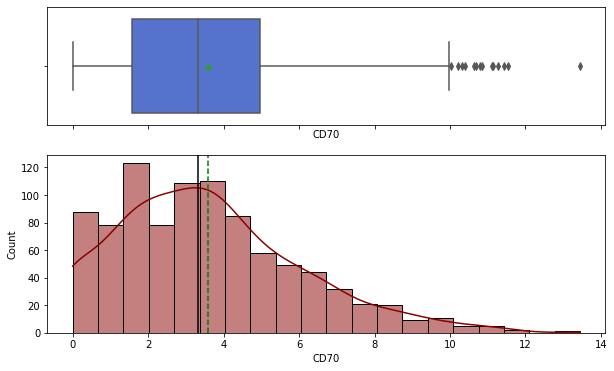

In [5]:
# Applying the function to get histogram and boxplot based on CD70 variable
histogram_boxplot(IA19, "CD70")

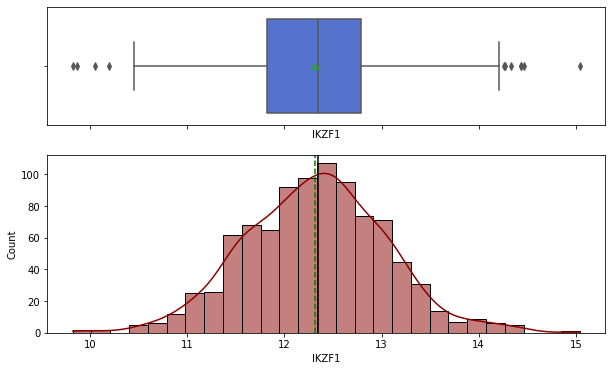

In [6]:
# Applying the function to get histogram and boxplot based on CD70 variable
histogram_boxplot(IA19, "IKZF1")

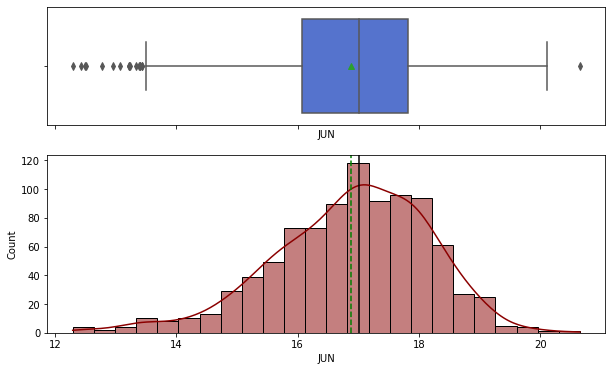

In [7]:
# Applying the function to get histogram and boxplot based on CD70 variable
histogram_boxplot(IA19, "JUN")

<AxesSubplot:>

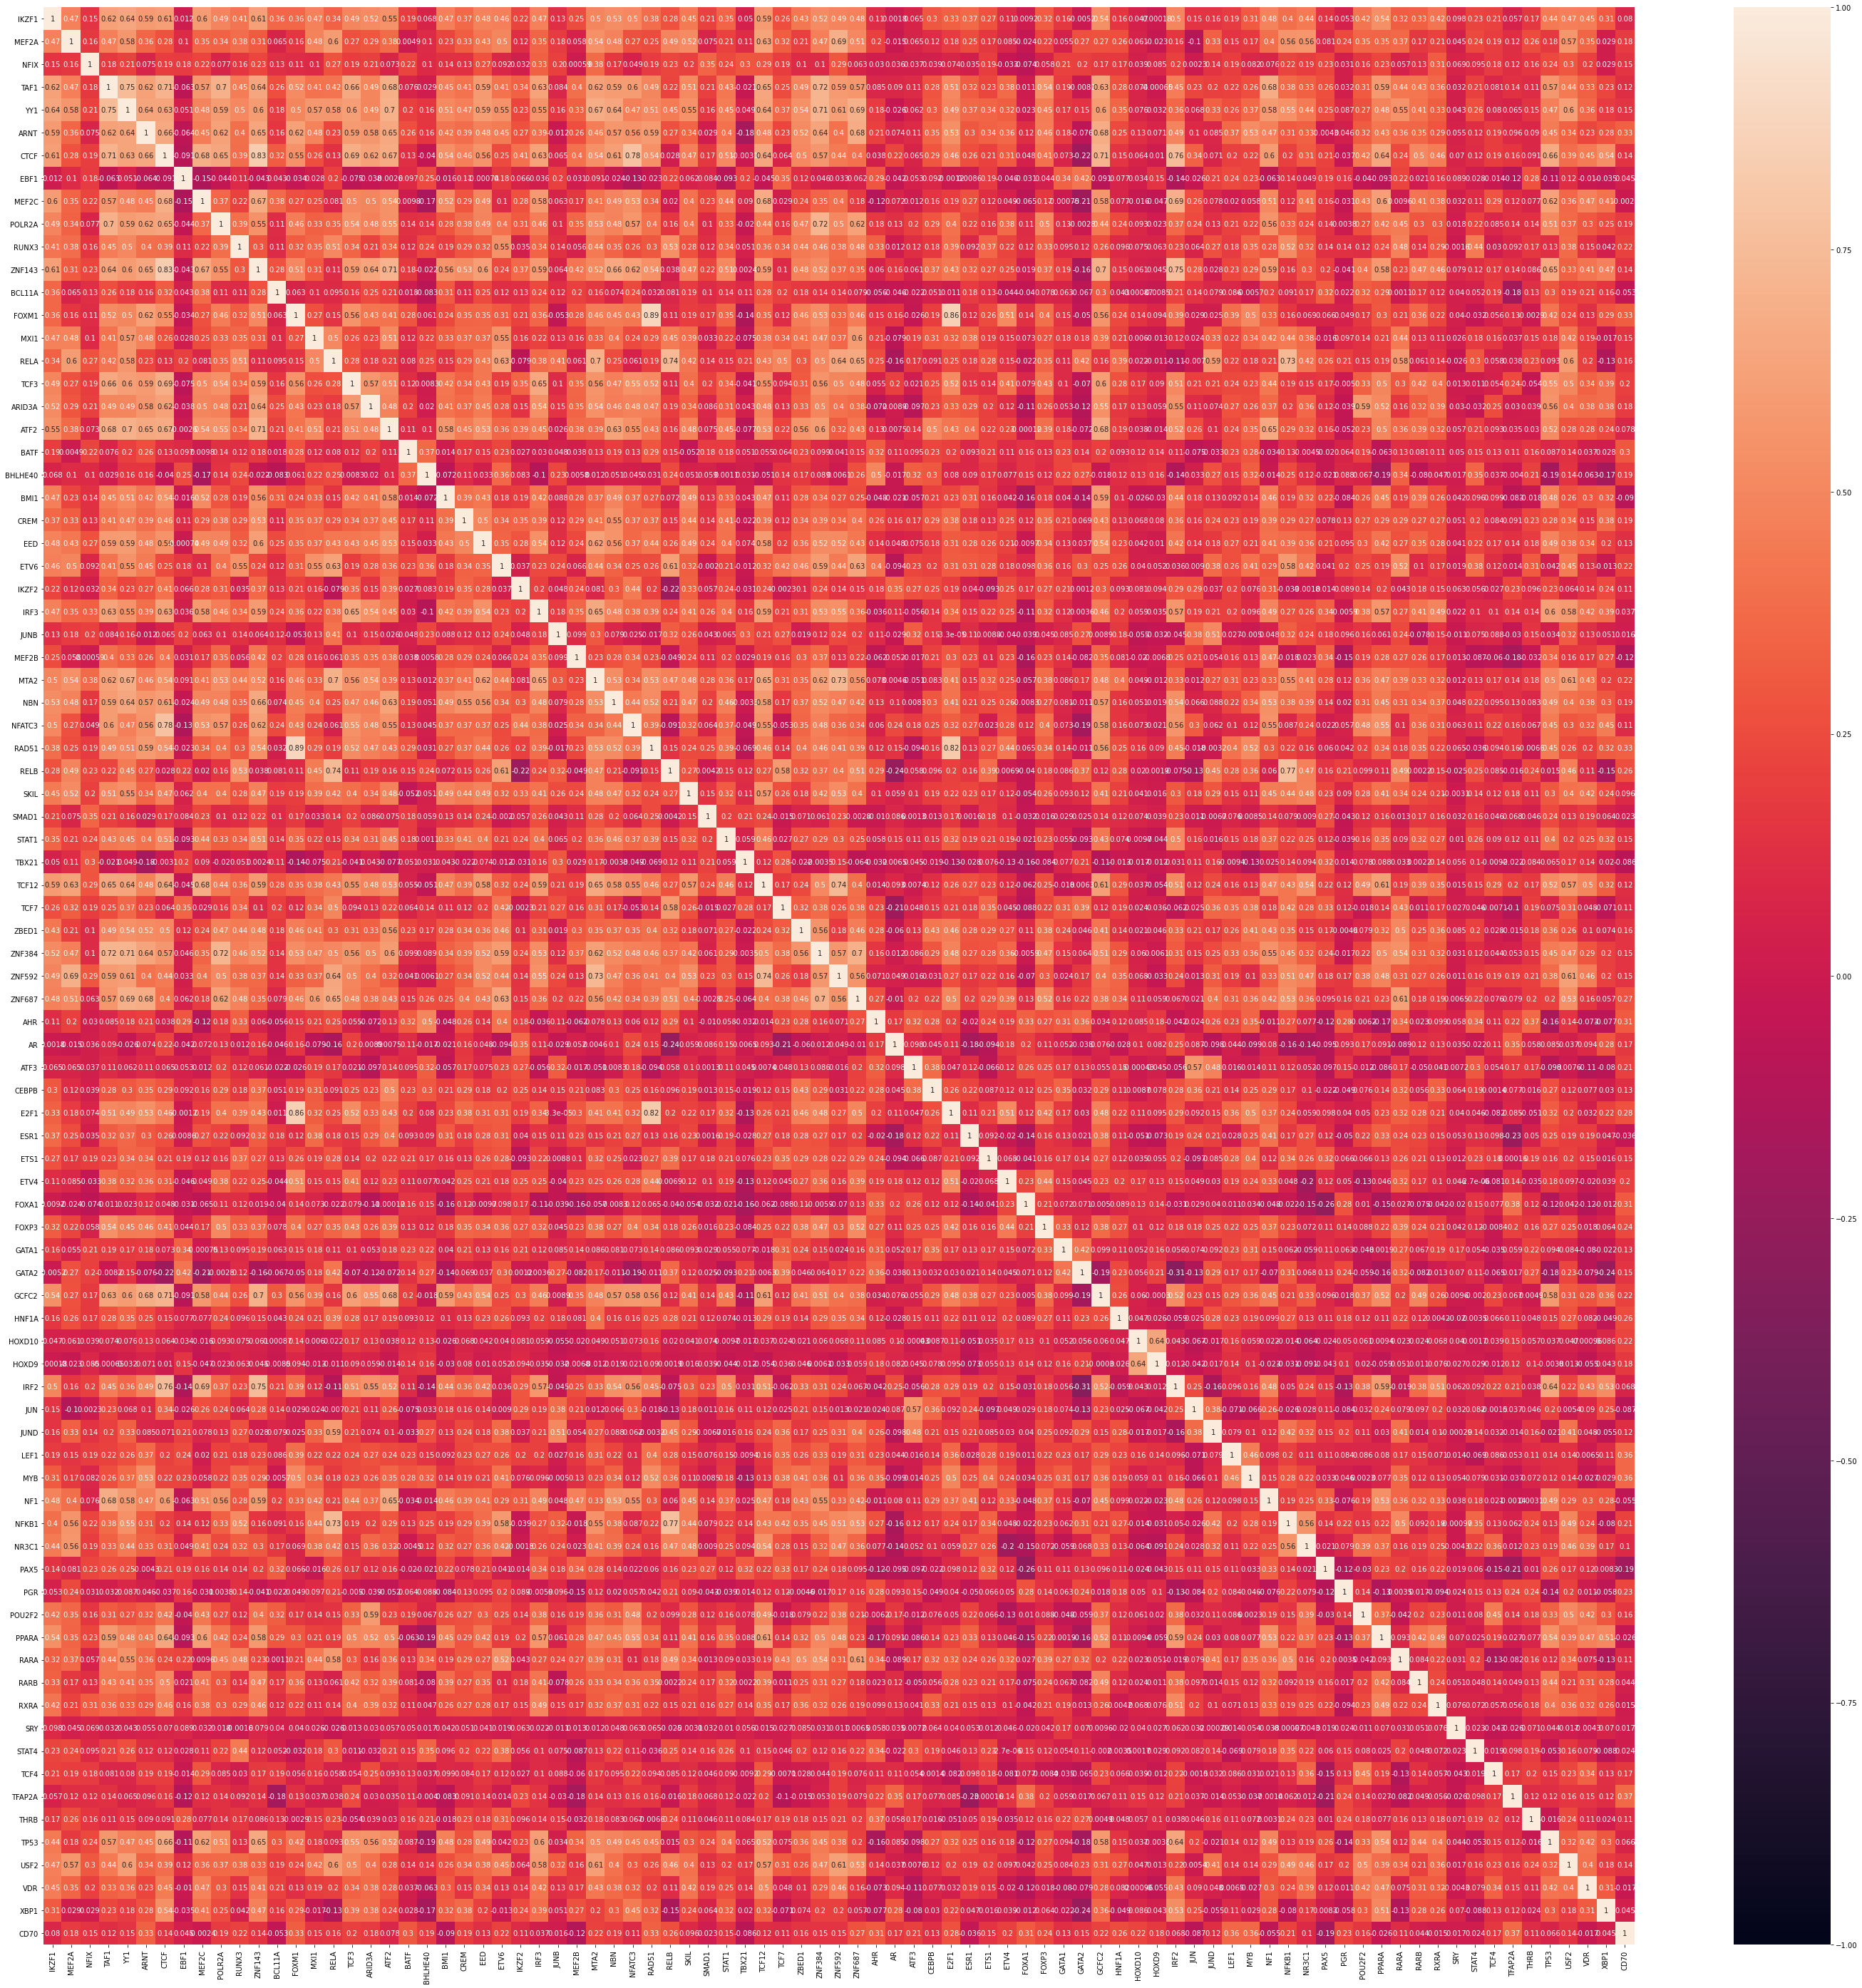

In [8]:
## Running heatmap, getting anotations and color scale (from -1 to 1) to easily determine strong correlation values
fig, ax = plt.subplots(figsize=(50, 50))
sns.heatmap(IA19.corr(), data=IA19, annot=True, vmin=-1, vmax=1)

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
IA19_Corr= IA19.corr(method ='pearson')

In [11]:
IA19_Corr

IKZF1     MEF2A      NFIX      TAF1       YY1      ARNT      CTCF  \
IKZF1  1.000000  0.469840  0.154311  0.619457  0.641896  0.587618  0.608330   
MEF2A  0.469840  1.000000  0.164337  0.467760  0.577229  0.358118  0.279753   
NFIX   0.154311  0.164337  1.000000  0.177370  0.212042  0.074871  0.189149   
TAF1   0.619457  0.467760  0.177370  1.000000  0.749200  0.623347  0.708663   
YY1    0.641896  0.577229  0.212042  0.749200  1.000000  0.638116  0.633342   
...         ...       ...       ...       ...       ...       ...       ...   
TP53   0.437957  0.176978  0.235915  0.573240  0.468464  0.452833  0.664959   
USF2   0.468002  0.566148  0.301802  0.441677  0.603517  0.341251  0.389210   
VDR    0.454576  0.347932  0.196162  0.332892  0.362220  0.232631  0.448398   
XBP1   0.311238  0.028898  0.028770  0.233681  0.182666  0.280202  0.538368   
CD70   0.079920  0.183179  0.153365  0.121858  0.150605  0.331749  0.141530   

           EBF1     MEF2C    POLR2A     RUNX3    ZNF143    BCL11A     FOXM1  \
IKZF1  0.012456  0.597780  0.486670  0.414700  0.609532  0.362724  0.364846   
MEF2A  0.104041  0.347266  0.341457  0.383545  0.308985  0.065190  0.156325   
NFIX   0.182884  0.221187  0.076681  0.157944  0.226800  0.128254  0.114717   
TAF1  -0.062731  0.571284  0.698378  0.453902  0.643735  0.260870  0.519841   
YY1    0.051256  0.484647  0.594136  0.504995  0.599552  0.184523  0.496913   
...         ...       ...       ...       ...       ...       ...       ...   
TP53  -0.106411  0.620699  0.508255  0.125639  0.652115  0.296093  0.418333   
USF2   0.123030  0.363255  0.367791  0.379921  0.333610  0.189346  0.237738   
VDR   -0.010239  0.472477  0.297207  0.146868  0.414909  0.213663  0.128930   
XBP1  -0.035283  0.412954  0.245899  0.042035  0.474084  0.157183  0.285125   
CD70   0.044957 -0.002357  0.185854  0.217163  0.140733 -0.052845  0.328096   

           MXI1      RELA      TCF3    ARID3A      ATF2      BATF   BHLHE40  \
IKZF1  0.470314  0.343403  0.494795  0.522170  0.548087  0.193782  0.067956   
MEF2A  0.483190  0.595139  0.266542  0.293119  0.379706  0.004893  0.103277   
NFIX   0.100240  0.274497  0.192280  0.207991  0.073083  0.220466  0.101476   
TAF1   0.410872  0.417227  0.660723  0.493594  0.682636  0.075579  0.028644   
YY1    0.574605  0.577914  0.602791  0.494959  0.702834  0.199215  0.159339   
...         ...       ...       ...       ...       ...       ...       ...   
TP53   0.179232  0.093140  0.546373  0.558689  0.522614  0.087315 -0.186069   
USF2   0.416559  0.601530  0.495522  0.402111  0.280666  0.137373  0.141495   
VDR    0.193295  0.203681  0.338849  0.381084  0.282955  0.036878 -0.063377   
XBP1  -0.016932 -0.129485  0.387579  0.383764  0.235020  0.028416 -0.174143   
CD70   0.148851  0.163388  0.202081  0.184546  0.078232  0.304179  0.186204   

           BMI1      CREM       EED      ETV6     IKZF2      IRF3      JUNB  \
IKZF1  0.465786  0.374520  0.480562  0.461200  0.224775  0.469204  0.126101   
MEF2A  0.226325  0.325398  0.433863  0.497393  0.117678  0.348635  0.182559   
NFIX   0.135712  0.133680  0.274768  0.091508  0.032044  0.332127  0.200770   
TAF1   0.454750  0.407570  0.585977  0.413231  0.337605  0.627285  0.083707   
YY1    0.511603  0.465849  0.594638  0.551921  0.230471  0.554824  0.163866   
...         ...       ...       ...       ...       ...       ...       ...   
TP53   0.475403  0.277269  0.486226  0.042328  0.232032  0.602449  0.034483   
USF2   0.263435  0.337456  0.377923  0.451095  0.064492  0.583822  0.316085   
VDR    0.302331  0.146479  0.342734  0.127258  0.140745  0.419829  0.132618   
XBP1   0.318456  0.378827  0.198754 -0.012895  0.244778  0.386696  0.051061   
CD70  -0.089837  0.192448  0.131953  0.216401  0.109035  0.037421  0.015885   

          MEF2B      MTA2       NBN    NFATC3     RAD51      RELB      SKIL  \
IKZF1  0.252501  0.495152  0.530686  0.501811  0.384368  0.276188  0.445170   
MEF2A  0.057831  0.542066  0.477029  0.267190  0.254294 

In [12]:
IA19_Corr['CD70']

IKZF1    0.079920
MEF2A    0.183179
NFIX     0.153365
TAF1     0.121858
YY1      0.150605
           ...   
TP53     0.066193
USF2     0.144308
VDR     -0.017047
XBP1     0.045141
CD70     1.000000
Name: CD70, Length: 85, dtype: float64

In [13]:
IA19_Corr['CD70'].to_csv('CD70 correlation with TF.csv', header=True, index=True)

In [14]:
IA19_Corr[IA19_Corr['CD70'] > 0.36]

IKZF1     MEF2A      NFIX      TAF1       YY1      ARNT      CTCF  \
LEF1    0.186428  0.150429  0.190239  0.215987  0.261804  0.371131  0.196063   
MYB     0.310590  0.174632  0.082117  0.263024  0.374857  0.528742  0.222133   
TFAP2A  0.057133  0.119344  0.121216  0.138859  0.065349  0.095582  0.158731   
CD70    0.079920  0.183179  0.153365  0.121858  0.150605  0.331749  0.141530   

            EBF1     MEF2C    POLR2A     RUNX3    ZNF143    BCL11A     FOXM1  \
LEF1    0.244889  0.020042  0.214325  0.182373  0.230926  0.086045  0.385247   
MYB     0.226147  0.058461  0.219445  0.345467  0.291691 -0.005745  0.504170   
TFAP2A -0.115922  0.118410  0.135474  0.092043  0.136668 -0.182536  0.132519   
CD70    0.044957 -0.002357  0.185854  0.217163  0.140733 -0.052845  0.328096   

            MXI1      RELA      TCF3    ARID3A      ATF2      BATF   BHLHE40  \
LEF1    0.219578  0.215184  0.240667  0.273863  0.239628  0.226650  0.154387   
MYB     0.344697  0.175073  0.234415  0.255823  0.345670  0.282568  0.323294   
TFAP2A  0.037187  0.038371  0.242839  0.030189  0.034589  0.110713 -0.004035   
CD70    0.148851  0.163388  0.202081  0.184546  0.078232  0.304179  0.186204   

            BMI1      CREM       EED      ETV6     IKZF2      IRF3      JUNB  \
LEF1    0.091915  0.233167  0.270709  0.263882  0.204264  0.199538  0.027198   
MYB     0.142762  0.189683  0.207442  0.405393  0.076451  0.095732 -0.004980   
TFAP2A -0.083105  0.091071  0.137392  0.013748  0.232315  0.141479 -0.030043   
CD70   -0.089837  0.192448  0.131953  0.216401  0.109035  0.037421  0.015885   

           MEF2B      MTA2       NBN    NFATC3     RAD51      RELB      SKIL  \
LEF1    0.159360  0.309591  0.221452  0.104709  0.404883  0.280744  0.146220   
MYB     0.127599  0.226009  0.338991  0.115620  0.521190  0.356019  0.106263   
TFAP2A -0.179106  0.136564  0.129009  0.157923  0.158888 -0.016437  0.180940   
CD70   -0.117880  0.216340  0.186838  0.108252  0.328232  0.258522  0.095642   

           SMAD1     STAT1     TBX21     TCF12      TCF7     ZBED1    ZNF384  \
LEF1    0.076117  0.151078 -0.009406  0.159566  0.345766  0.257144  0.330387   
MYB     0.008479  0.176354 -0.128936  0.132949  0.382266  0.413721  0.363903   
TFAP2A  0.067894  0.115516 -0.021860  0.199366 -0.102735 -0.015060  0.053087   
CD70    0.022978  0.146124 -0.085651  0.121900  0.108378  0.155372  0.153579   

          ZNF592    ZNF687       AHR        AR      ATF3     CEBPB      E2F1  \
LEF1    0.192777  0.306914  0.229253  0.044053  0.016064  0.140217  0.363324   
MYB     0.101659  0.359155  0.348698 -0.098872  0.014212  0.253591  0.495597   
TFAP2A  0.190163  0.079154  0.224667  0.348082  0.167308  0.077472  0.084856   
CD70    0.154571  0.274139  0.309331  0.168628  0.205488  0.131596  0.278080   

            ESR1      ETS1      ETV4     FOXA1     FOXP3     GATA1     GATA2  \
LEF1    0.028387  0.282273  0.194571  0.011442  0.223231  0.233553  0.172855   
MYB     0.251344  0.396065  0.237277  0.033852  0.252852  0.314069  0.174241   
TFAP2A -0.234105  0.000156  0.143629  0.383079  0.198333  0.059478  0.016961   
CD70   -0.036068  0.150511  0.200781  0.306175  0.237240  0.126538  0.151671   

           GCFC2     HNF1A    HOXD10     HOXD9      IRF2       JUN      JUND  \
LEF1    0.292289  0.225666  0.156929  0.135510  0.096483 -0.070868  0.078946   
MYB     0.355219  0.188622  0.058730  0.104431  0.158477 -0.065529  0.100921   
TFAP2A  0.066717  0.106121  0.150124  0.121366  0.209408  0.037414 -0.014396   
CD70    0.216814  0.257126  0.224981  0.178809  0.068275 -0.086713  0.120472   

            LEF1       MYB       NF1     NFKB1     NR3C1      PAX5       PGR  \
LEF1    1.000000  0.458808  0.098485  0.202595  0.110677  0.105487  0.084086   
MYB     0.458808  1.000000  0.153665  0.284741  0.221273  0.033288  0.045923   
TFAP2A  0.053122 -0.036869 -0.001397  0.062223  0.011698 -0.208911  0.236231   
CD70    0.360237  0.360765 -0.054824  0.213302  0.101366 -0.186957  0.231936   

 

In [15]:
IA19_Corr[IA19_Corr['CD70'] < -0.1]

IKZF1     MEF2A      NFIX      TAF1       YY1      ARNT      CTCF  \
MEF2B  0.252501  0.057831  0.000592  0.397896  0.330578  0.260284  0.402580   
PAX5   0.142913  0.081220  0.232326  0.262242  0.253206 -0.004275  0.213791   

           EBF1     MEF2C    POLR2A     RUNX3    ZNF143    BCL11A     FOXM1  \
MEF2B  0.030710  0.169756  0.354169  0.056135  0.424279  0.202338  0.282477   
PAX5   0.188583  0.161040  0.140908  0.135767  0.203150  0.324639  0.065930   

           MXI1      RELA      TCF3    ARID3A      ATF2      BATF   BHLHE40  \
MEF2B  0.159227  0.061055  0.353330  0.348402  0.377317  0.038294  0.005830   
PAX5  -0.015783  0.260154  0.168104  0.121337  0.162433 -0.019608 -0.021231   

           BMI1      CREM       EED      ETV6     IKZF2      IRF3      JUNB  \
MEF2B  0.281199  0.288357  0.240465  0.066138  0.243095  0.351823  0.098751   
PAX5   0.220386  0.077665  0.214999  0.041358  0.014226  0.343319  0.184831   

          MEF2B      MTA2       NBN    NFATC3     RAD51      RELB      SKIL  \
MEF2B  1.000000  0.233237  0.279536  0.336768  0.233875 -0.048582  0.243426   
PAX5   0.336689  0.276887  0.140917  0.022131  0.059537  0.155152  0.226932   

          SMAD1     STAT1     TBX21     TCF12      TCF7     ZBED1    ZNF384  \
MEF2B  0.110379  0.200768  0.028757  0.192812  0.161376  0.303518  0.367371   
PAX5   0.271588  0.120908  0.318424  0.217186  0.325974  0.174134  0.240432   

         ZNF592    ZNF687       AHR        AR      ATF3     CEBPB      E2F1  \
MEF2B  0.131624  0.223562 -0.062120  0.052218 -0.016599  0.206605  0.303981   
PAX5   0.180361  0.094541 -0.118304 -0.095333 -0.097206 -0.021955  0.098002   

           ESR1      ETS1      ETV4     FOXA1     FOXP3     GATA1     GATA2  \
MEF2B  0.228344  0.101069  0.226738 -0.158179  0.229640  0.136249 -0.082039   
PAX5   0.123369  0.317744  0.116503 -0.262302  0.107134  0.113527  0.128197   

          GCFC2     HNF1A    HOXD10     HOXD9      IRF2       JUN      JUND  \
MEF2B  0.348596  0.080736 -0.019705 -0.006807  0.251540  0.213050  0.053515   
PAX5   0.096489  0.105519 -0.024113 -0.043497  0.148768  0.112043  0.145782   

           LEF1       MYB       NF1     NFKB1     NR3C1      PAX5       PGR  \
MEF2B  0.159360  0.127599  0.470539 -0.017897  0.022965  0.336689 -0.146011   
PAX5   0.105487  0.033288  0.330818  0.141657  0.021231  1.000000 -0.116918   

         POU2F2     PPARA      RARA      RARB      RXRA       SRY     STAT4  \
MEF2B  0.192306  0.280187  0.268259  0.258745  0.173184  0.013236 -0.087305   
PAX5  -0.029846  0.226812  0.204295  0.156415  0.216763  0.019182  0.059901   

           TCF4    TFAP2A      THRB      TP53      USF2       VDR      XBP1  \
MEF2B -0.059629 -0.179106 -0.032366  0.340476  0.158434  0.174496  0.267302   
PAX5  -0.154456 -0.208911  0.010370  0.258919  0.167206  0.119903  0.008341   

           CD70  
MEF2B -0.117880  
PAX5  -0.186957

In [16]:
IA19.head()

IKZF1      MEF2A      NFIX       TAF1        YY1       ARNT       CTCF  \
0  11.784635  11.070792  3.906891  10.236014  11.321364  10.188589  11.530894   
1  12.419697  11.365776  6.686501   9.748193  11.685625  10.090112  11.208234   
2  12.744203  11.916999  7.845490  11.631632  12.025486  11.042343  11.906139   
3  11.389631  11.304351  7.366322  10.136991  11.416270   9.417853  11.070792   
4  11.971184  11.896711  6.303781  10.413628  11.408860  10.709945  12.095397   

       EBF1      MEF2C     POLR2A      RUNX3     ZNF143     BCL11A      FOXM1  \
0  1.000000  13.739992  11.781360  10.301496   8.754888  10.019591   8.366322   
1  2.321928  13.751962  12.541581  11.213712   9.364135  10.980854   5.700440   
2  9.310613  14.450438  12.798472  12.015067  10.343186  10.644758   8.066089   
3  2.807355  13.125413  11.873060  10.925554   9.022368   9.495855   6.794416   
4  3.000000  13.216746  13.664225  10.231221   9.560333   8.954196  10.906139   

        MXI1       RELA       TCF3     ARID3A       ATF2      BATF    BHLHE40  \
0  11.137632  11.259743  13.812779  11.813380  10.647458  3.000000   9.409391   
1  11.117643  12.651052  13.369597  12.027215  10.791163  6.930737   8.957102   
2  11.487338  12.631177  14.450567  13.226563  11.662668  4.754888  11.133142   
3   9.729621  11.835261  13.102960  11.343741  10.002815  4.523562   7.294621   
4  11.209453  11.977280  13.825754  12.637304  10.629357  7.076816  10.830515   

        BMI1       CREM       EED       ETV6     IKZF2       IRF3       JUNB  \
0  12.403012  10.016808  8.430453  10.525521  9.027906  12.032390  14.639793   
1  13.313450   8.813781  8.098032  10.669771  1.000000  11.467606  14.568075   
2  14.849601  10.075479  9.672425  11.877668  7.607330  12.806147  15.358651   
3  13.179598   9.167418  8.271463  10.157347  6.475733  11.970106  14.421999   
4  12.263269   9.036174  8.741467  11.530894  8.696968  11.225810  14.645433   

      MEF2B       MTA2        NBN     NFATC3     RAD51       RELB       SKIL  \
0  2.000000  11.007728  11.241983  10.691744  6.169925   9.090112  11.452241   
1  3.807355  12.077150  10.857981  10.015415  5.392317  11.997885  10.635718   
2  5.832890  12.868823  12.334273  10.672425  7.321928  11.913637  13.236612   
3  2.321928  11.967947  10.777255   9.204571  5.807355  10.931476  11.450180   
4  4.700440  12.136671  11.371232  10.709084  8.348728   8.870365  11.752799   

       SMAD1      STAT1     TBX21      TCF12      TCF7      ZBED1     ZNF384  \
0   4.169925  12.160187  5.209453  11.550266  4.000000   8.573647   9.856426   
1   8.087463  12.493355  4.754888  11.528942  5.954196   8.939579   9.413628   
2  10.718533  13.589534  2.000000  12.493605  6.129283  10.199672  10.828930   
3   7.994353  14.538431  6.954196  11.559855  4.523562   7.734710   9.824959   
4  11.027906  12.641374  6.339850  11.719389  4.087463   8.308339  10.094078   

      ZNF592     ZNF687       AHR        AR       ATF3      CEBPB      E2F1  \
0  11.024447  11.173677  7.774787  5.285402  13.845098  10.023754  8.900867   
1  11.497353  11.166163  4.000000  0.000000   9.744834   9.896332  7.199672   
2  12.066426  11.408330  5.977280  1.000000  10.474720   9.995767  7.948367   
3  11.335949  10.418907  4.321928  4.857981  10.616549   9.344296  8.228819   
4  12.381543  11.658658  7.900867  3.459432  10.812979  10.350939  9.908393   

        ESR1       ETS1      ETV4     FOXA1     FOXP3     GATA1     GATA2  \
0   9.157347   8.033423  5.426265  9.184875  3.584963  1.000000  0.000000   
1   9.658211  12.623424  1.000000  0.000000  2.584963  3.700440  2.321928   
2  12.042343  12.847645  3.807355  0.000000  3.459432  2.584963  1.000000   
3   9.310613   9.874981  1.584963  0.000000  1.000000  0.000000  1.000000   
4   8.977280   9.445015  4.321928  1.000000  3.584963  3.321928  1.000000   

      GCFC2  HNF1A  HOXD10  HOXD9       IRF2        JUN       JUND      LEF1  \
0  8.797662    1.0     0.0    0.0  10.626622  18.170086  15.951399  6.614710   
1  8.

In [17]:
IA19.describe().T

count       mean       std        min        25%        50%        75%  \
IKZF1  928.0  12.320782  0.724012   9.823367  11.825058  12.342491  12.792281   
MEF2A  928.0  12.143395  0.754410   9.590587  11.635943  12.071127  12.592866   
NFIX   928.0   5.839964  1.948080   0.000000   4.459432   5.781360   7.257388   
TAF1   928.0  11.343386  0.706183   8.139551  10.879196  11.344296  11.805139   
YY1    928.0  12.088985  0.612072   9.885696  11.645094  12.086136  12.487522   
...      ...        ...       ...        ...        ...        ...        ...   
TP53   928.0  10.660562  0.998555   4.643856  10.049847  10.729196  11.328815   
USF2   928.0  12.939295  0.552576  10.984418  12.594499  12.936546  13.286557   
VDR    928.0  11.384067  0.869270   8.710806  10.838810  11.363313  11.940034   
XBP1   928.0  16.396741  0.898758  12.877476  15.805051  16.440243  17.043193   
CD70   928.0   3.589966  2.443269   0.000000   1.584963   3.321928   4.954196   

             max  
IKZF1  15.041103  
MEF2A  15.060443  
NFIX   10.967226  
TAF1   13.898790  
YY1    14.139791  
...          ...  
TP53   13.866989  
USF2   15.622853  
VDR    14.390236  
XBP1   19.054480  
CD70   13.445015  

[85 rows x 8 columns]

In [18]:
IA19.shape

(928, 85)

In [19]:
IA19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 85 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   IKZF1    928 non-null    float64
 1   MEF2A    928 non-null    float64
 2   NFIX     928 non-null    float64
 3   TAF1     928 non-null    float64
 4   YY1      928 non-null    float64
 5   ARNT     928 non-null    float64
 6   CTCF     928 non-null    float64
 7   EBF1     928 non-null    float64
 8   MEF2C    928 non-null    float64
 9   POLR2A   928 non-null    float64
 10  RUNX3    928 non-null    float64
 11  ZNF143   928 non-null    float64
 12  BCL11A   928 non-null    float64
 13  FOXM1    928 non-null    float64
 14  MXI1     928 non-null    float64
 15  RELA     928 non-null    float64
 16  TCF3     928 non-null    float64
 17  ARID3A   928 non-null    float64
 18  ATF2     928 non-null    float64
 19  BATF     928 non-null    float64
 20  BHLHE40  928 non-null    float64
 21  BMI1     928 non

In [20]:
# Replace infinite updated data with nan
#IA19.replace([np.inf, -np.inf], np.nan, inplace=True)

In [21]:
IA19.head()

IKZF1      MEF2A      NFIX       TAF1        YY1       ARNT       CTCF  \
0  11.784635  11.070792  3.906891  10.236014  11.321364  10.188589  11.530894   
1  12.419697  11.365776  6.686501   9.748193  11.685625  10.090112  11.208234   
2  12.744203  11.916999  7.845490  11.631632  12.025486  11.042343  11.906139   
3  11.389631  11.304351  7.366322  10.136991  11.416270   9.417853  11.070792   
4  11.971184  11.896711  6.303781  10.413628  11.408860  10.709945  12.095397   

       EBF1      MEF2C     POLR2A      RUNX3     ZNF143     BCL11A      FOXM1  \
0  1.000000  13.739992  11.781360  10.301496   8.754888  10.019591   8.366322   
1  2.321928  13.751962  12.541581  11.213712   9.364135  10.980854   5.700440   
2  9.310613  14.450438  12.798472  12.015067  10.343186  10.644758   8.066089   
3  2.807355  13.125413  11.873060  10.925554   9.022368   9.495855   6.794416   
4  3.000000  13.216746  13.664225  10.231221   9.560333   8.954196  10.906139   

        MXI1       RELA       TCF3     ARID3A       ATF2      BATF    BHLHE40  \
0  11.137632  11.259743  13.812779  11.813380  10.647458  3.000000   9.409391   
1  11.117643  12.651052  13.369597  12.027215  10.791163  6.930737   8.957102   
2  11.487338  12.631177  14.450567  13.226563  11.662668  4.754888  11.133142   
3   9.729621  11.835261  13.102960  11.343741  10.002815  4.523562   7.294621   
4  11.209453  11.977280  13.825754  12.637304  10.629357  7.076816  10.830515   

        BMI1       CREM       EED       ETV6     IKZF2       IRF3       JUNB  \
0  12.403012  10.016808  8.430453  10.525521  9.027906  12.032390  14.639793   
1  13.313450   8.813781  8.098032  10.669771  1.000000  11.467606  14.568075   
2  14.849601  10.075479  9.672425  11.877668  7.607330  12.806147  15.358651   
3  13.179598   9.167418  8.271463  10.157347  6.475733  11.970106  14.421999   
4  12.263269   9.036174  8.741467  11.530894  8.696968  11.225810  14.645433   

      MEF2B       MTA2        NBN     NFATC3     RAD51       RELB       SKIL  \
0  2.000000  11.007728  11.241983  10.691744  6.169925   9.090112  11.452241   
1  3.807355  12.077150  10.857981  10.015415  5.392317  11.997885  10.635718   
2  5.832890  12.868823  12.334273  10.672425  7.321928  11.913637  13.236612   
3  2.321928  11.967947  10.777255   9.204571  5.807355  10.931476  11.450180   
4  4.700440  12.136671  11.371232  10.709084  8.348728   8.870365  11.752799   

       SMAD1      STAT1     TBX21      TCF12      TCF7      ZBED1     ZNF384  \
0   4.169925  12.160187  5.209453  11.550266  4.000000   8.573647   9.856426   
1   8.087463  12.493355  4.754888  11.528942  5.954196   8.939579   9.413628   
2  10.718533  13.589534  2.000000  12.493605  6.129283  10.199672  10.828930   
3   7.994353  14.538431  6.954196  11.559855  4.523562   7.734710   9.824959   
4  11.027906  12.641374  6.339850  11.719389  4.087463   8.308339  10.094078   

      ZNF592     ZNF687       AHR        AR       ATF3      CEBPB      E2F1  \
0  11.024447  11.173677  7.774787  5.285402  13.845098  10.023754  8.900867   
1  11.497353  11.166163  4.000000  0.000000   9.744834   9.896332  7.199672   
2  12.066426  11.408330  5.977280  1.000000  10.474720   9.995767  7.948367   
3  11.335949  10.418907  4.321928  4.857981  10.616549   9.344296  8.228819   
4  12.381543  11.658658  7.900867  3.459432  10.812979  10.350939  9.908393   

        ESR1       ETS1      ETV4     FOXA1     FOXP3     GATA1     GATA2  \
0   9.157347   8.033423  5.426265  9.184875  3.584963  1.000000  0.000000   
1   9.658211  12.623424  1.000000  0.000000  2.584963  3.700440  2.321928   
2  12.042343  12.847645  3.807355  0.000000  3.459432  2.584963  1.000000   
3   9.310613   9.874981  1.584963  0.000000  1.000000  0.000000  1.000000   
4   8.977280   9.445015  4.321928  1.000000  3.584963  3.321928  1.000000   

      GCFC2  HNF1A  HOXD10  HOXD9       IRF2        JUN       JUND      LEF1  \
0  8.797662    1.0     0.0    0.0  10.626622  18.170086  15.951399  6.614710   
1  8.

In [22]:
#IA19 = IA19.fillna(IA19.mean())
## IA19 = IA19.dropna(axis=0)

In [23]:
IA19

IKZF1      MEF2A      NFIX       TAF1        YY1       ARNT  \
0    11.784635  11.070792  3.906891  10.236014  11.321364  10.188589   
1    12.419697  11.365776  6.686501   9.748193  11.685625  10.090112   
2    12.744203  11.916999  7.845490  11.631632  12.025486  11.042343   
3    11.389631  11.304351  7.366322  10.136991  11.416270   9.417853   
4    11.971184  11.896711  6.303781  10.413628  11.408860  10.709945   
..         ...        ...       ...        ...        ...        ...   
923  12.219169  11.502335  4.584963  10.682995  12.165535  10.975848   
924  11.960364  11.001408  4.754888  11.504819  12.691089  11.156715   
925  13.078484  12.066089  5.247928  12.036517  12.374224  12.076482   
926  12.405407  11.219169  8.233620  12.947089  12.458663  11.309476   
927  13.570923  14.062552  6.247928  13.282220  14.029546  13.006326   

          CTCF       EBF1      MEF2C     POLR2A      RUNX3     ZNF143  \
0    11.530894   1.000000  13.739992  11.781360  10.301496   8.754888   
1    11.208234   2.321928  13.751962  12.541581  11.213712   9.364135   
2    11.906139   9.310613  14.450438  12.798472  12.015067  10.343186   
3    11.070792   2.807355  13.125413  11.873060  10.925554   9.022368   
4    12.095397   3.000000  13.216746  13.664225  10.231221   9.560333   
..         ...        ...        ...        ...        ...        ...   
923  10.530406   2.584963  12.841368  11.680799  11.194757   8.098032   
924  12.113742   0.000000  13.370687  12.530406  11.807355   9.481799   
925  12.281061   2.807355  13.502832  12.776844  10.803324  10.162391   
926  11.810572   1.000000  13.082981  14.063985  13.698813   8.927778   
927  13.728558  11.216746  14.451919  14.324602  13.550506  11.144658   

        BCL11A      FOXM1       MXI1       RELA       TCF3     ARID3A  \
0    10.019591   8.366322  11.137632  11.259743  13.812779  11.813380   
1    10.980854   5.700440  11.117643  12.651052  13.369597  12.027215   
2    10.644758   8.066089  11.487338  12.631177  14.450567  13.226563   
3     9.495855   6.794416   9.729621  11.835261  13.102960  11.343741   
4     8.954196  10.906139  11.209453  11.977280  13.825754  12.637304   
..         ...        ...        ...        ...        ...        ...   
923  10.522582   8.618386  11.579316  12.280191  13.627078  10.203348   
924  11.191676   9.475733  11.180531  12.445532  13.961088  11.561288   
925  11.906891   9.394463  11.372321  12.202430  14.808160  12.002463   
926  10.269127  11.823367  11.476746  13.195680  13.840778  11.046442   
927  11.184875  11.655531  12.669107  13.909237  15.960251  12.051549   

          ATF2      BATF    BHLHE40       BMI1       CREM        EED  \
0    10.647458  3.000000   9.409391  12.403012  10.016808   8.430453   
1    10.791163  6.930737   8.957102  13.313450   8.813781   8.098032   
2    11.662668  4.754888  11.133142  14.849601  10.075479   9.672425   
3    10.002815  4.523562   7.294621  13.179598   9.167418   8.271463   
4    10.629357  7.076816  10.830515  12.263269   9.036174   8.741467   
..         ...       ...        ...        ...        ...        ...   
923  10.665336  5.247928  10.043027  12.511506   9.350939   8.027906   
924  11.506803  9.519636   5.672425  13.900867   9.400879   9.885696   
925  11.921841  4.000000   6.228819  13.745989  10.740624  10.203348   
926  10.920353  2.807355   8.224002  13.258713   9.273796   9.810572   
927  12.940497  6.266787  10.459432  15.286810  10.198445   9.884171   

          ETV6      IKZF2       IRF3       JUNB     MEF2B       MTA2  \
0    10.525521   9.027906  12.032390  14.639793  2.000000  11.007728   
1    10.669771   1.000000  11.467606  14.568075  3.807355  12.077150   
2    11.877668   7.607330  12.806147  15.358651  5.832890  12.868823   
3    10.157347   6.475733  11.970106  14.421999  2.321928  11.967947   
4    11.530894   8.696968  11.225810  14.645433  4.700440  12.136671   
..         ...        ...        ...        ...       ...        ...   
923  11.401413   7.45

In [24]:
IA19.describe().T

count       mean       std        min        25%        50%        75%  \
IKZF1  928.0  12.320782  0.724012   9.823367  11.825058  12.342491  12.792281   
MEF2A  928.0  12.143395  0.754410   9.590587  11.635943  12.071127  12.592866   
NFIX   928.0   5.839964  1.948080   0.000000   4.459432   5.781360   7.257388   
TAF1   928.0  11.343386  0.706183   8.139551  10.879196  11.344296  11.805139   
YY1    928.0  12.088985  0.612072   9.885696  11.645094  12.086136  12.487522   
...      ...        ...       ...        ...        ...        ...        ...   
TP53   928.0  10.660562  0.998555   4.643856  10.049847  10.729196  11.328815   
USF2   928.0  12.939295  0.552576  10.984418  12.594499  12.936546  13.286557   
VDR    928.0  11.384067  0.869270   8.710806  10.838810  11.363313  11.940034   
XBP1   928.0  16.396741  0.898758  12.877476  15.805051  16.440243  17.043193   
CD70   928.0   3.589966  2.443269   0.000000   1.584963   3.321928   4.954196   

             max  
IKZF1  15.041103  
MEF2A  15.060443  
NFIX   10.967226  
TAF1   13.898790  
YY1    14.139791  
...          ...  
TP53   13.866989  
USF2   15.622853  
VDR    14.390236  
XBP1   19.054480  
CD70   13.445015  

[85 rows x 8 columns]

## Data Preprocesing

### Data Preparation for Modeling

In [25]:
X = IA19.drop('CD70', axis=1)
y = IA19['CD70']

In [26]:
# Splitting data into training and test set:
## I needed to remove stratify=y to give variability since there are too many values in the target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape)

(742, 84) (186, 84)


In [27]:
X_train.shape, X_test.shape

((742, 84), (186, 84))

In [28]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [29]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_r2=metrics.r2_score(y_train,pred_train)
    test_r2=metrics.r2_score(y_test,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaure on training set : ",metrics.r2_score(y_train,pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))
    
    # returning the list with train and test scores
    return score_list

In [30]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Random Forest

In [31]:
rf_estimator=RandomForestRegressor(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [32]:
rf_estimator_model_train_perf = model_performance_regression(rf_estimator, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
        RMSE      MAE  R-squared  Adj. R-squared  MAPE
0  0.718679  0.55857   0.915259        0.904424   inf


In [33]:
rf_estimator_model_test_perf = model_performance_regression(rf_estimator, X_test,y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  1.808277  1.424347   0.398444       -0.101859   inf


### Hyperparameter Tuning

In [34]:
%%time

# Choose the type of classifier. 
rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
                'max_depth':[300], #np.arange(300,1000,100),#[6, 8, 10, 112, None],
                'max_features': [None],#['sqrt','log2',None],
                'n_estimators': [800]#np.arange(300,1000,100) #[80, 90, 100, 110, 120]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=10)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

CPU times: user 2min 53s, sys: 733 ms, total: 2min 54s
Wall time: 2min 55s


RandomForestRegressor(max_depth=300, max_features=None, n_estimators=800,
                      random_state=1)

In [35]:
rf_tuned_model_train_perf = model_performance_regression(rf_tuned, X_train, y_train)
print("Training performance \n",rf_tuned_model_train_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.707941  0.553501   0.917772        0.907259   inf


In [36]:
rf_tuned_model_test_perf = model_performance_regression(rf_tuned, X_test, y_test)
print("Testing performance \n",rf_tuned_model_test_perf)

Testing performance 
       RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  1.79293  1.394355   0.408612       -0.083236   inf


In [37]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

             Imp
TFAP2A  0.119142
MYB     0.066506
LEF1    0.060879
PAX5    0.037546
FOXM1   0.034497
...          ...
HOXD10  0.004690
ZNF143  0.004078
CTCF    0.002923
HOXD9   0.001902
SRY     0.000049

[84 rows x 1 columns]


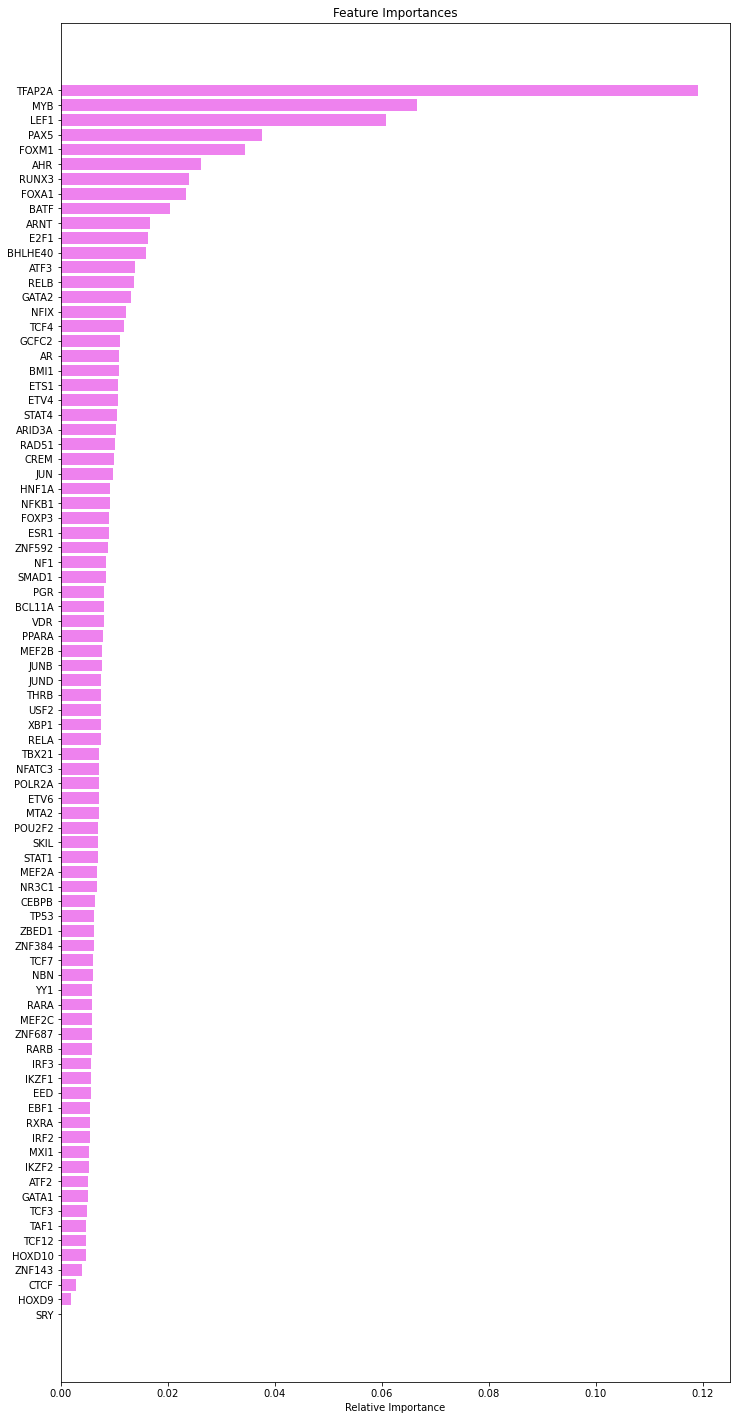

In [38]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,25))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### XGBoost Regressor

In [39]:
xgb_estimator=XGBRegressor(random_state=1, verbosity = 0)
xgb_estimator.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1, ...)

In [40]:
xgb_estimator_model_train_perf = model_performance_regression(xgb_estimator, X_train, y_train)
print("Training performance \n",xgb_estimator_model_train_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.002288  0.001619   0.999999        0.999999   inf


In [41]:
xgb_estimator_model_test_perf = model_performance_regression(xgb_estimator, X_test,y_test)
print("Testing performance \n",xgb_estimator_model_test_perf)

Testing performance 
        RMSE      MAE  R-squared  Adj. R-squared  MAPE
0  1.913776  1.48216   0.326204        -0.23418   inf


### Hyperparameter Tuning

In [42]:
%%time

# defining model
model = XGBRegressor(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid={'colsample_bytree': [0.5], #np.arange(0.1,1,0.1), #[0.1, 0.5, 1], [0.5]
            'colsample_bylevel': [0.9], #np.arange(0.1,1,0.1),
            'colsample_bynode': [0.4], #np.arange(0.1,1,0.1), # [0.1, 0.5, 1]
            'gamma': [0.4], #np.arange(0.1,1,0.1),
            'learning_rate': [0.1], #np.arange(0.1,1,0.1), #[0.1, 0.3, 0.5, 0.7],
            'max_depth': [3], #np.arange(1,4,1),
            'n_estimators': [300], #np.arange(1000,2000,100), #[20,50,100,200],[300]
            'subsample':np.arange(0.1,1,0.1)}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

#Calling RandomizedSearchCV
xgb_tuned2 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=5000, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned2 = xgb_tuned2.fit(X_train,y_train)

# Set the clf to the best combination of parameters
model = xgb_tuned2.best_estimator_

# Fit the best algorithm to the data. 
model.fit(X_train, y_train)


CPU times: user 5.35 s, sys: 251 ms, total: 5.6 s
Wall time: 5.38 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.9, colsample_bynode=0.4, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.4, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1, ...)

In [43]:
xgb_tuned_model_train_perf = model_performance_regression(model, X_train, y_train)
print("Training performance \n",xgb_tuned_model_train_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.446895  0.344772   0.967233        0.963044   inf


In [44]:
xgb_tuned_model_test_perf = model_performance_regression(model, X_test, y_test)
print("Testing performance \n",xgb_tuned_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  1.700791  1.286501   0.467833        0.025238   inf


In [45]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

             Imp
TFAP2A  0.061290
FOXA1   0.048727
LEF1    0.046684
BATF    0.040029
PAX5    0.035769
...          ...
ZNF384  0.003866
TCF3    0.003301
IRF2    0.003140
MEF2A   0.002616
SRY     0.001045

[84 rows x 1 columns]


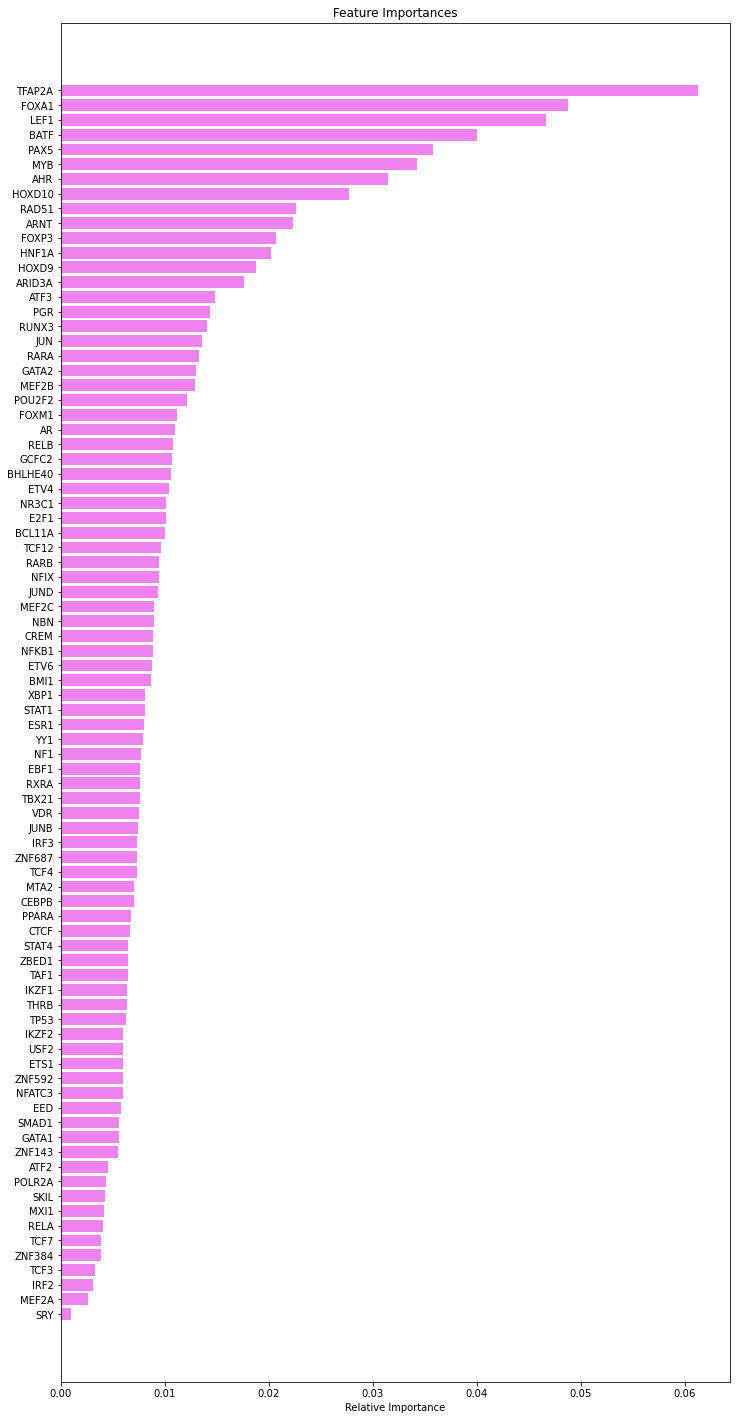

In [46]:
feature_names = X_test.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,25))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## SHAP (SHapley Additive exPlanations)

In [47]:
import shap

In [48]:
## Initialize the package
shap.initjs()

In [49]:
# compute SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

In [50]:
#explainer = shap.TreeExplainer(model)
#shap_values = explainer.shap_values(X_test)

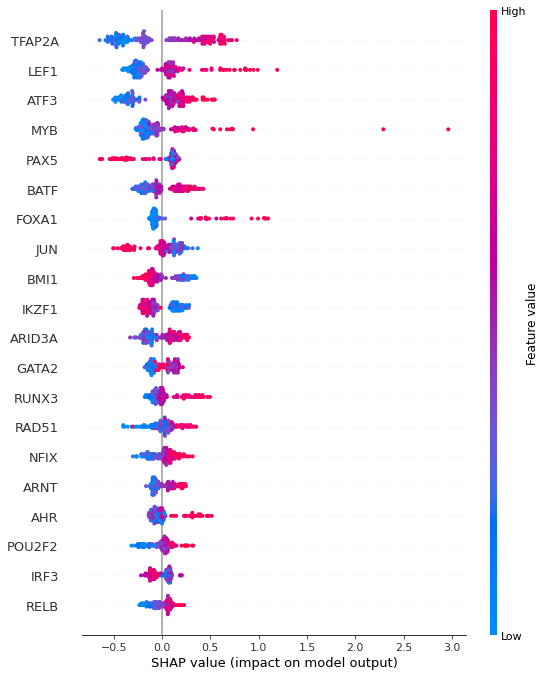

In [51]:
# Make plot.
shap.summary_plot(shap_values, X_test)

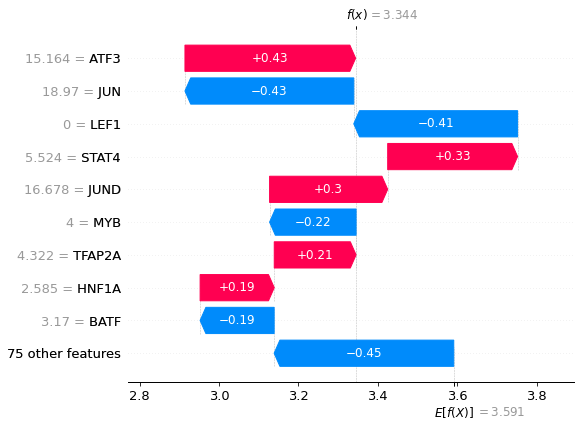

In [52]:
# the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[0])

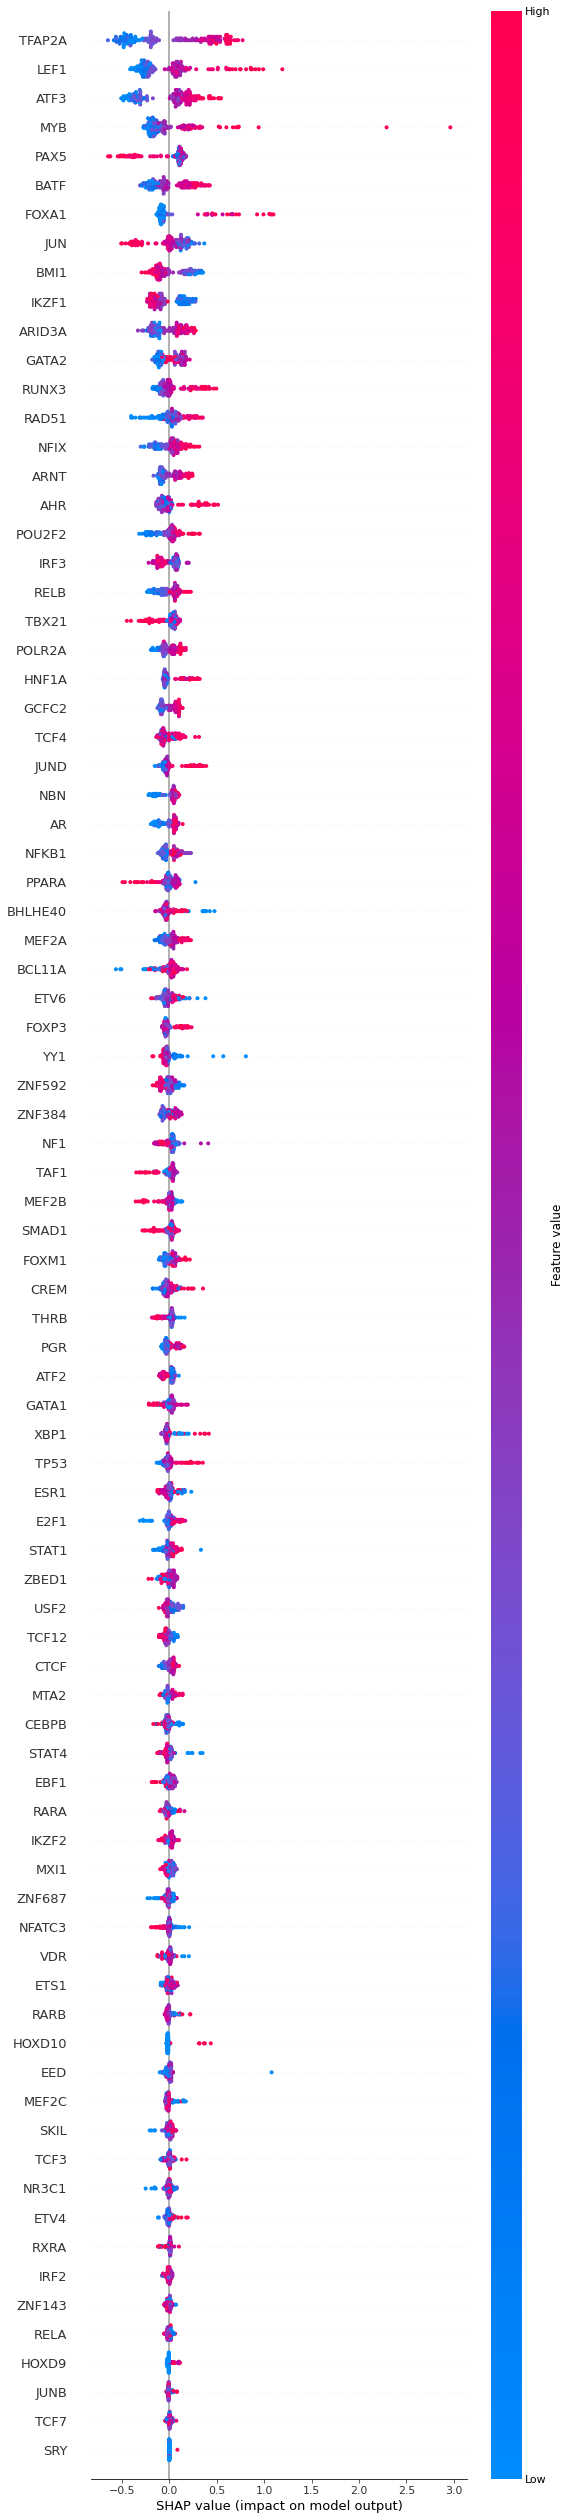

In [53]:
# Make plot.
shap.summary_plot(shap_values, X_test, max_display=100)

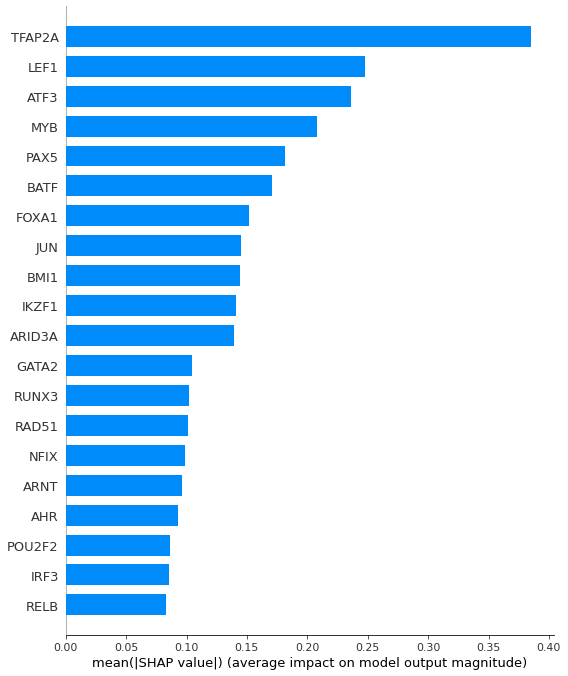

In [54]:
shap.summary_plot(shap_values, X, plot_type="bar")

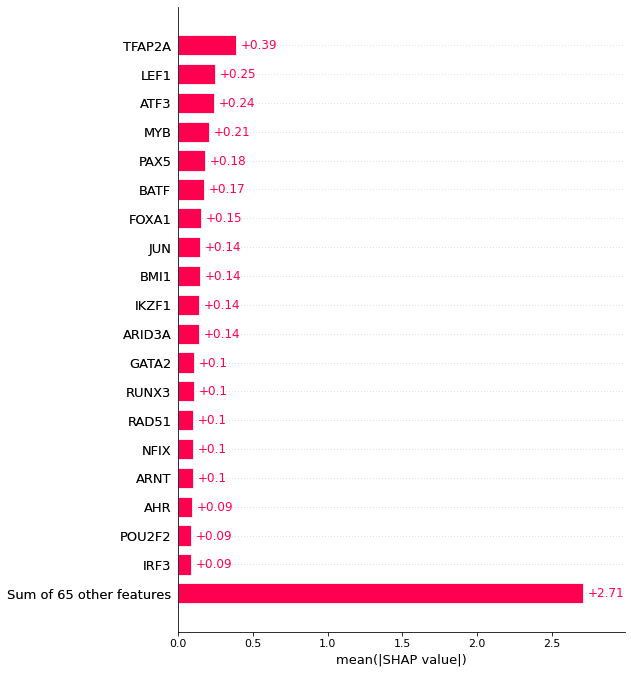

In [55]:
shap.plots.bar(shap_values, max_display=20)

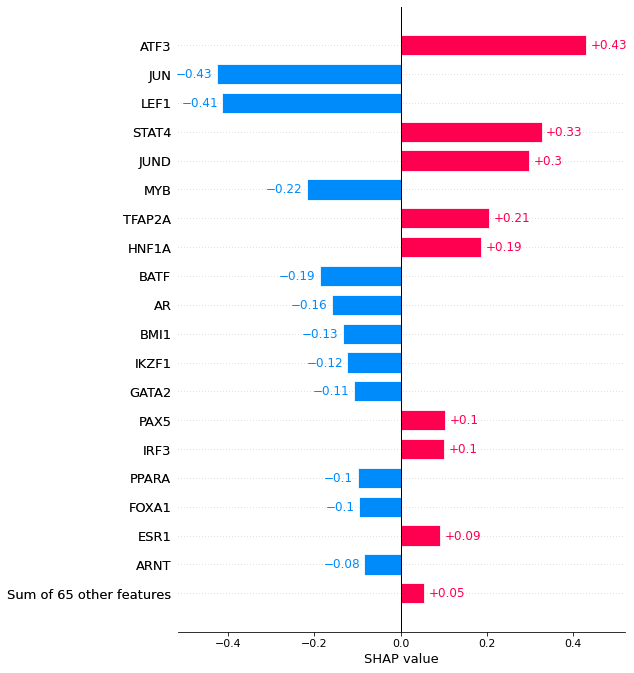

In [56]:
shap.plots.bar(shap_values[0], max_display=20)

In [57]:
clustering = shap.utils.hclust(X, y)

85it [00:37,  1.67it/s]                        


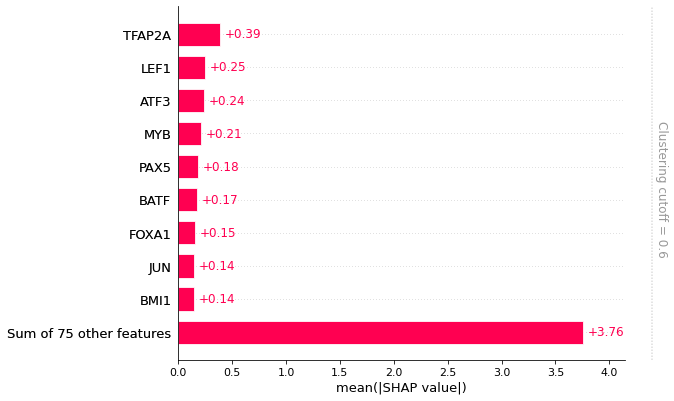

In [58]:
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=0.6)

In [59]:
tree_explainer = shap.TreeExplainer(model)
shap_values = tree_explainer.shap_values(X)
shap.force_plot(tree_explainer.expected_value, shap_values[10,:], X_test.iloc[0,:])

In [60]:
predictions = model.predict(X_test)

In [61]:
predictions

array([ 3.34418   ,  5.205512  ,  2.830061  ,  3.846464  ,  2.1616745 ,
        4.786996  ,  2.414353  , -0.67497075,  2.934232  ,  3.1929789 ,
        3.892153  ,  0.748948  ,  3.0594797 ,  4.292823  ,  2.7838452 ,
        2.888722  ,  4.7329354 ,  2.5019295 ,  3.4773617 ,  6.885535  ,
        2.4543633 ,  2.523368  ,  2.6542847 ,  2.1031072 ,  2.9304457 ,
        2.3634586 ,  4.155787  ,  6.183755  ,  3.7982454 ,  3.321873  ,
        2.6152039 ,  3.348659  ,  4.947618  ,  4.289634  ,  6.119778  ,
        4.967822  ,  2.9160419 ,  2.2427187 ,  0.9149424 ,  3.964083  ,
        5.8727107 ,  3.2507048 ,  5.022519  ,  1.8906698 ,  5.4047    ,
        3.5603676 ,  1.8205506 ,  0.46055725,  1.3620074 ,  3.2750826 ,
        1.7180943 ,  5.903913  ,  4.0754523 ,  1.7422844 ,  2.8847332 ,
        3.4434612 ,  1.1116381 ,  2.0258    ,  3.3998625 ,  2.6452324 ,
        4.831644  ,  3.016367  ,  6.9041657 ,  3.851556  ,  2.6988358 ,
        3.5288513 ,  2.756017  ,  2.771286  ,  5.2821283 ,  7.99

In [62]:
predictions2 = model.predict(X_train)

In [63]:
predictions2

array([ 2.3539748e+00,  4.4643850e+00,  1.7854373e+00,  1.7114354e+00,
        2.3070159e+00,  1.4277992e+00,  6.7263761e+00,  9.3631458e-01,
        2.9973230e+00,  2.8752420e+00,  7.7675357e+00,  5.3746328e+00,
        1.8327011e+00,  7.1284604e+00,  3.3267341e+00,  7.3161640e+00,
        5.4174690e+00,  1.0001999e-01,  5.1301193e+00,  2.2667973e+00,
        4.5475893e+00,  1.7318089e+00,  5.7919297e+00,  1.4035865e+00,
        3.6046414e+00,  7.1888695e+00,  5.1401505e+00,  3.8659918e+00,
        1.0112350e+01,  2.1101551e+00,  7.8222060e+00,  1.2591391e+00,
        2.9678593e+00,  2.0572095e+00,  1.1354526e+00,  3.4621553e+00,
        3.5567539e+00,  4.0377445e+00,  3.6854949e+00,  2.2660649e+00,
        5.5547080e+00,  6.0264278e-02,  7.0418334e-01,  7.7062621e+00,
        4.4786539e+00,  8.7510738e+00,  9.6745950e-01,  3.5594828e+00,
        1.3210489e+00,  2.6869552e+00,  5.4547000e+00,  2.8835807e+00,
        4.3244238e+00,  9.6684418e+00,  8.9109826e-01,  6.2740712e+00,
      

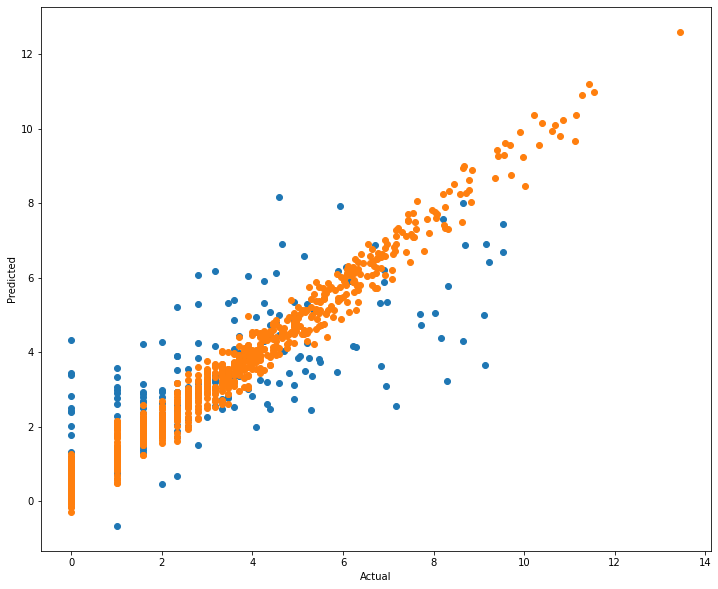

In [64]:
plt.figure(figsize=(12,10))
plt.scatter(y_test, predictions)
plt.scatter(y_train, predictions2)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

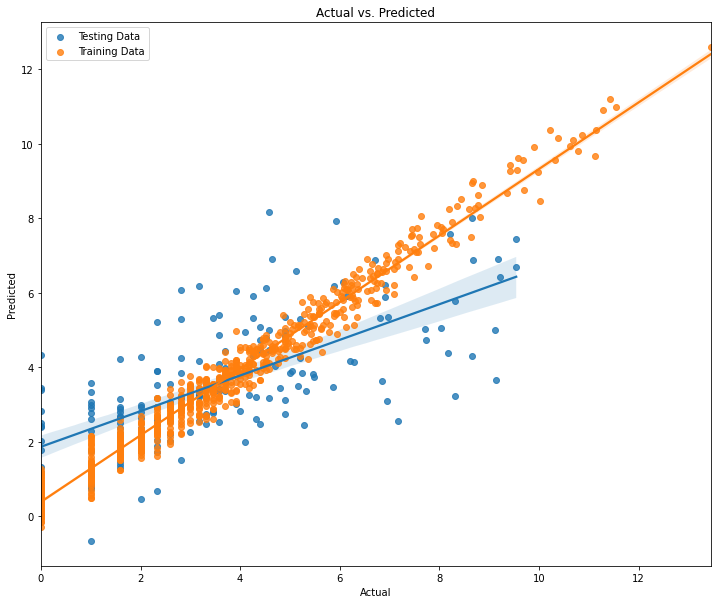

In [65]:
plt.figure(figsize=(12,10))
sns.regplot(y_test, predictions, label="Testing Data")
sns.regplot(y_train, predictions2, label="Training Data")

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend(loc="upper left")
plt.show()

# 20 Top Transcription factors

In [66]:
Top20 = IA19 [['CD70', 'TFAP2A', 'LEF1', 'ATF3', 'MYB', 'PAX5', 'BATF', 'FOXA1', 'JUN', 'BMI1', 'IKZF1', 'ARID3A', 
               'GATA2', 'RUNX3', 'RAD51', 'NFIX', 'ARNT', 'AHR', 'POU2F2', 'IRF3']]

In [67]:
Top20

CD70    TFAP2A       LEF1       ATF3        MYB       PAX5      BATF  \
0    3.321928  6.303781   6.614710  13.845098   4.643856   5.954196  3.000000   
1    2.321928  1.000000   3.700440   9.744834   3.807355  11.653293  6.930737   
2    2.000000  1.000000   2.000000  10.474720  10.967226  11.622509  4.754888   
3    1.584963  1.584963   3.321928  10.616549   4.087463  10.202124  4.523562   
4    4.857981  0.000000   6.930737  10.812979   6.169925   9.964341  7.076816   
..        ...       ...        ...        ...        ...        ...       ...   
923  3.906891  2.584963   4.459432  13.550506   5.491853   5.357552  5.247928   
924  1.584963  0.000000   8.129283   8.596190   5.491853  12.397407  9.519636   
925  2.321928  2.584963   3.807355  13.610794   5.129283  11.822571  4.000000   
926  2.584963  2.584963  10.810572  11.903505  11.039605   0.000000  2.807355   
927  3.000000  3.459432   7.741467  12.961992   8.199672  13.308055  6.266787   

         FOXA1        JUN       BMI1      IKZF1     ARID3A     GATA2  \
0     9.184875  18.170086  12.403012  11.784635  11.813380  0.000000   
1     0.000000  15.150977  13.313450  12.419697  12.027215  2.321928   
2     0.000000  17.866349  14.849601  12.744203  13.226563  1.000000   
3     0.000000  16.957737  13.179598  11.389631  11.343741  1.000000   
4     1.000000  16.973653  12.263269  11.971184  12.637304  1.000000   
..         ...        ...        ...        ...        ...       ...   
923  10.129283  15.491008  12.511506  12.219169  10.203348  3.807355   
924   0.000000  17.701083  13.900867  11.960364  11.561288  1.584963   
925   0.000000  18.447951  13.745989  13.078484  12.002463  2.000000   
926   0.000000  16.199136  13.258713  12.405407  11.046442  1.000000   
927   0.000000  19.442680  15.286810  13.570923  12.051549  6.727920   

         RUNX3     RAD51      NFIX       ARNT        AHR     POU2F2       IRF3  
0    10.301496  6.169925  3.906891  10.188589   7.774787  12.718747  12.032390  
1    11.213712  5.392317  6.686501  10.090112   4.000000  12.548099  11.467606  
2    12.015067  7.321928  7.845490  11.042343   5.977280  13.682227  12.806147  
3    10.925554  5.807355  7.366322   9.417853   4.321928  12.083147  11.970106  
4    10.231221  8.348728  6.303781  10.709945   7.900867  13.651164  11.225810  
..         ...       ...       ...        ...        ...        ...        ...  
923  11.194757  6.459432  4.584963  10.975848  10.480790  12.168985  11.178665  
924  11.807355  7.523562  4.754888  11.156715   3.169925  13.687157  12.405939  
925  10.803324  8.000000  5.247928  12.076482   5.700440  13.236612  13.340128  
926  13.698813  9.955650  8.233620  11.309476   8.861087  12.867279  12.446049  
927  13.550506  8.960002  6.247928  13.006326   8.930737  14.281785  13.352871  

[928 rows x 20 columns]

In [68]:
X20 = Top20.drop('CD70', axis=1)
y20 = Top20['CD70']

In [69]:
# Splitting data into training and test set:
## I needed to remove stratify=y to give variability since there are too many values in the target column
X20_train, X20_test, y20_train, y20_test = train_test_split(X20, y20, test_size=0.2, random_state=1)
print(X20_train.shape, X20_test.shape)

(742, 19) (186, 19)


In [70]:
X20_train.shape, X20_test.shape

((742, 19), (186, 19))

# Random Forest in the top 20

In [71]:
rf_estimator=RandomForestRegressor(random_state=1)
rf_estimator.fit(X20_train,y20_train)

RandomForestRegressor(random_state=1)

In [72]:
rf_estimator_model_train_perf = model_performance_regression(rf_estimator, X20_train,y20_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
       RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.70171  0.549418   0.919213        0.917087   inf


In [73]:
rf_estimator_model_test_perf = model_performance_regression(rf_estimator, X20_test,y20_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  1.826426  1.416551   0.386308        0.316067   inf


In [74]:
%%time

# defining model
model = RandomForestRegressor(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid={'bootstrap': [False],
 'max_depth': [100], #np.arange(1,1000,100), #[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['sqrt'], #['auto', 'sqrt', 'None'],
 'min_samples_leaf': [2], #np.arange(1,10,1), #[1, 2, 4],
 'min_samples_split': np.arange(1,10,1), #[2, 5, 10],
 'n_estimators': [300], #np.arange(1,1000,100) #[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}
            
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

#Calling RandomizedSearchCV
rf_tuned2 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50000, scoring=scorer, cv=10, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
rf_tuned2 = rf_tuned2.fit(X20_train,y20_train)

# Set the clf to the best combination of parameters
model = rf_tuned2.best_estimator_

# Fit the best algorithm to the data. 
model.fit(X20_train, y20_train)

CPU times: user 1.59 s, sys: 35.6 ms, total: 1.62 s
Wall time: 14.5 s


RandomForestRegressor(bootstrap=False, max_depth=100, max_features='sqrt',
                      min_samples_leaf=2, n_estimators=300, random_state=1)

In [75]:
rf_tuned2_model_top20_train_perf = model_performance_regression(model, X20_train, y20_train)
print("Training performance \n",rf_tuned2_model_top20_train_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.283837  0.173524   0.986782        0.986434   inf


In [76]:
rf_tuned2_model_top20_test_perf = model_performance_regression(model, X20_test, y20_test)
print("Training performance \n",rf_tuned2_model_top20_test_perf)

Training performance 
        RMSE      MAE  R-squared  Adj. R-squared  MAPE
0  1.801786  1.41023   0.402755        0.334396   inf


# Hyperparameter tuning in the top 20

In [77]:
# Choose the type of classifier. 
rf_tuned_top20 = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {  'max_depth':[300], #np.arange(300,400,10),#[6, 8, 10, 112, None],
                'max_features': ['sqrt'], #['sqrt','log2',None],
                'n_estimators': [800] #np.arange(100,1000,100) #[80, 90, 100, 110, 120]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned_top20, parameters, scoring=scorer,cv=10)
grid_obj = grid_obj.fit(X20_train, y20_train)

# Set the clf to the best combination of parameters
rf_tuned_top20 = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned_top20.fit(X20_train, y20_train)

RandomForestRegressor(max_depth=300, max_features='sqrt', n_estimators=800,
                      random_state=1)

In [78]:
rf_tuned_model_top20_train_perf = model_performance_regression(rf_tuned_top20, X20_train, y20_train)
print("Training performance \n",rf_tuned_model_top20_train_perf)

Training performance 
       RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.69934  0.549466   0.919758        0.917646   inf


In [79]:
rf_tuned_model_top20_test_perf = model_performance_regression(rf_tuned_top20, X20_test, y20_test)
print("Training performance \n",rf_tuned_model_top20_test_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  1.796858  1.394758   0.406018        0.338032   inf


# SHAP (SHapley Additive exPlanations) in Random forrest tuned with 20 top transcription factors

In [80]:
import shap

In [81]:
## Initialize the package
shap.initjs()

In [82]:
# compute SHAP values
explainer = shap.Explainer(rf_tuned_top20)
shap_values = explainer(X20_test)

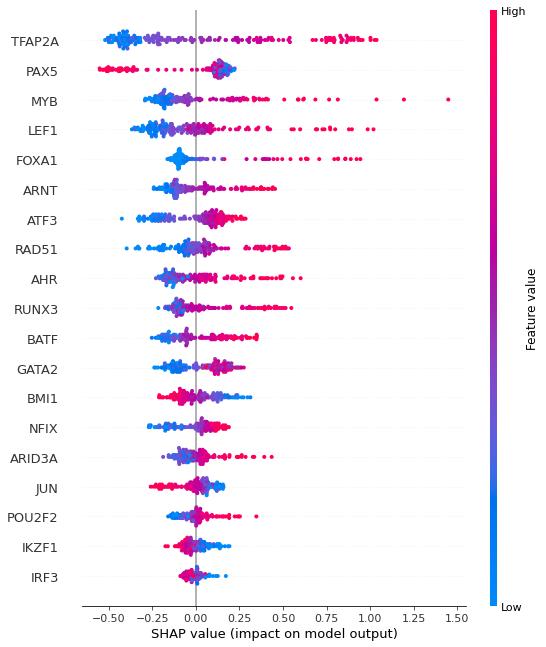

In [83]:
# Make plot.
shap.summary_plot(shap_values, X20_test)

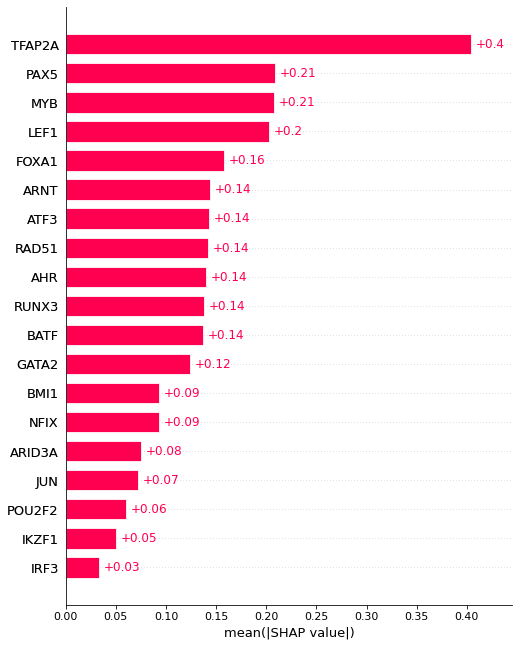

In [84]:
shap.plots.bar(shap_values, max_display=20)

# XGBoost in top 20

In [85]:
xgb_estimator=XGBRegressor(random_state=1, verbosity = 0)
xgb_estimator.fit(X20_train,y20_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1, ...)

In [86]:
xgb_estimator_model_train_perf = model_performance_regression(xgb_estimator, X20_train, y20_train)
print("Training performance \n",xgb_estimator_model_train_perf)

Training performance 
        RMSE      MAE  R-squared  Adj. R-squared  MAPE
0  0.016628  0.01159   0.999955        0.999953   inf


In [87]:
xgb_estimator_model_test_perf = model_performance_regression(xgb_estimator, X20_test, y20_test)
print("Training performance \n",xgb_estimator_model_test_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  1.963844  1.484702   0.290487        0.209278   inf


# Hyperparameter tunning on XGBoost in the top 20

In [88]:
%%time

# defining model
model = XGBRegressor(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid={'colsample_bytree': [0.8], #np.arange(0.1,1,0.1), #[0.4], #[0.5], #[0.1, 0.5, 1],
            'colsample_bylevel': [0.4], #np.arange(0.1,1,0.1),#[0.3]
            'colsample_bynode': [0.3], #np.arange(0.1,1,0.1), #[0.1], # [0.1, 0.5, 1]
            'gamma': [0.7000000000000001], #np.arange(0.1,1,0.1), #[0.8], 
            'learning_rate': [0.1], #np.arange(0.1,1,0.1), #[0.1], #np.arange(0.1,1,0.1), #[0.1, 0.3, 0.5, 0.7],
            'max_depth': [3], #np.arange(1,6,1), #[2], 
            'n_estimators': [200], #np.arange(1,1000,100), #[150], #[20,50,100,200], [150]
            'subsample':np.arange(0.1,1,0.1)
            #'min_child_weight': [7], #np.arange(1,10, 1), #[5],
            #'booster': ['gbtree'] #['gbtree', 'gblinear']
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

#Calling RandomizedSearchCV
xgb_tuned2 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50000, scoring=scorer, cv=10, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned2 = xgb_tuned2.fit(X20_train,y20_train)

# Set the clf to the best combination of parameters
model = xgb_tuned2.best_estimator_

# Fit the best algorithm to the data. 
model.fit(X20_train, y20_train)

CPU times: user 1.74 s, sys: 89.1 ms, total: 1.83 s
Wall time: 1.47 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.4, colsample_bynode=0.3, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.7000000000000001,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1, ...)

In [89]:
xgb_tuned_model_train_perf = model_performance_regression(model, X20_train, y20_train)
print("Training performance \n",xgb_tuned_model_train_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  1.097702  0.859726   0.802306        0.797103   inf


In [90]:
xgb_tuned_model_test_perf = model_performance_regression(model, X20_test, y20_test)
print("Testing performance \n",xgb_tuned_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  1.803873  1.395591   0.401371        0.332853   inf


# SHAP 

In [91]:
## Initialize the package
shap.initjs()

In [92]:
# compute SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X20_test)

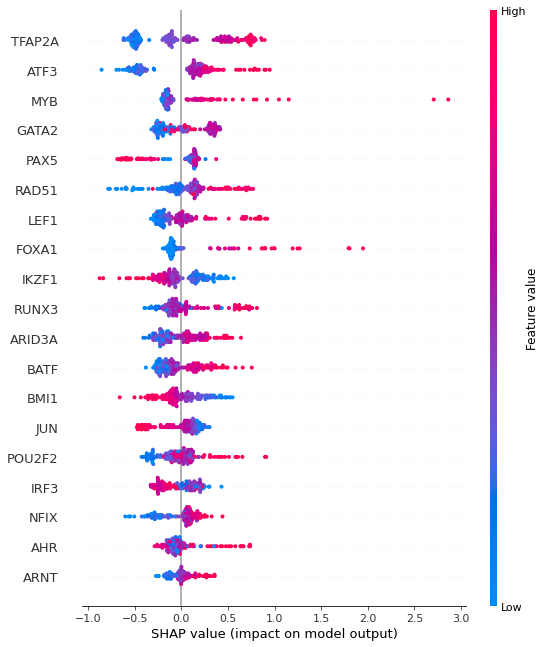

In [93]:
# Make plot.
shap.summary_plot(shap_values, X20_test)

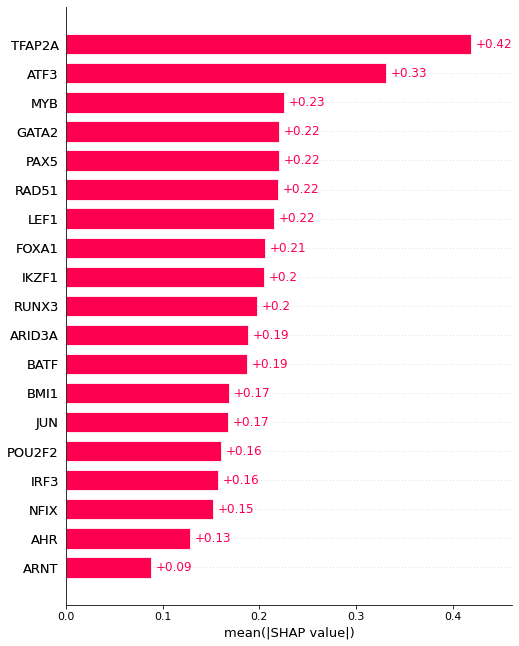

In [94]:
shap.plots.bar(shap_values, max_display=20)

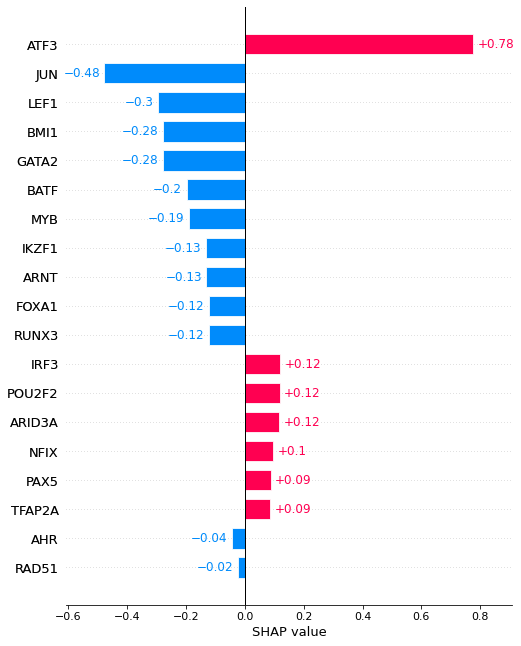

In [95]:
shap.plots.bar(shap_values[0], max_display=20)